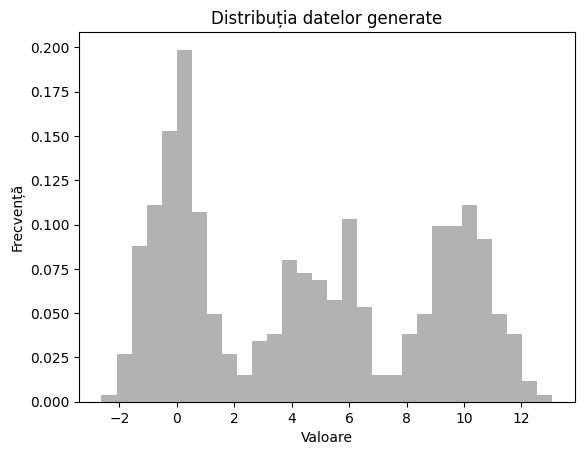

WAIC values: {2: 2634.635776236287, 3: 2527.559449090656, 4: 2530.8587656350546}
LOO values: {2: 2634.635776236287, 3: 2527.559449090656, 4: 2530.8587656350546}
Cel mai bun model conform WAIC: 3 componente
Cel mai bun model conform LOO: 3 componente


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# 1. Generarea datelor
np.random.seed(42)

# Parametrii celor 3 distribuții Gaussiene
n_cluster = [200, 150, 150]
means = [0, 5, 10]
std_devs = [1, 1.5, 1]

# Generăm datele
data = np.concatenate([
    np.random.normal(means[i], std_devs[i], n_cluster[i]) for i in range(3)
])

# Vizualizarea datelor
plt.hist(data, bins=30, density=True, alpha=0.6, color="gray")
plt.title("Distribuția datelor generate")
plt.xlabel("Valoare")
plt.ylabel("Frecvență")
plt.show()

# 2. Calibrarea modelelor de mixtură Gaussiene
models = {}
log_likelihoods = {}

for n_components in [2, 3, 4]:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(data.reshape(-1, 1))
    models[n_components] = gmm
    log_likelihoods[n_components] = gmm.score_samples(data.reshape(-1, 1))

# 3. Calcularea WAIC și LOO manual
def calculate_waic_loo(log_likelihoods):
    """
    Calcularea WAIC și LOO din log-likelihood.
    """
    # Convertim log-likelihood în probabilități (exponențial)
    log_lik_matrix = np.array(log_likelihoods)
    
    # Calculăm WAIC
    lppd = np.sum(np.log(np.mean(np.exp(log_lik_matrix), axis=0)))
    p_waic = np.sum(np.var(log_lik_matrix, axis=0))
    waic = -2 * (lppd - p_waic)
    
    # Calculăm LOO
    loo = -2 * np.sum(np.log(np.mean(np.exp(log_lik_matrix), axis=0)))
    
    return waic, loo

waic_values = {}
loo_values = {}

for n, log_lik in log_likelihoods.items():
    waic, loo = calculate_waic_loo([log_lik])
    waic_values[n] = waic
    loo_values[n] = loo

# 4. Afișarea rezultatelor
print("WAIC values:", waic_values)
print("LOO values:", loo_values)

# Determinăm modelele cele mai bune
best_model_waic = min(waic_values, key=waic_values.get)
best_model_loo = min(loo_values, key=loo_values.get)

print(f"Cel mai bun model conform WAIC: {best_model_waic} componente")
print(f"Cel mai bun model conform LOO: {best_model_loo} componente")
